# Estadística descriptiva

Medidas estadísticas utilizadas para describir las propiedades de los datos:

Medidas de tendencia central

1. Media aritmética
2. Moda
3. Mediana

Medidas de dispersión

4. Desviación respecto a la media aritmética
5. Varianza
6. Covarianza
7. Desviación estándar
8. Cuartiles
9. Correlación
10. Valor atípico

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

mainpath = "../datasets/"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## 1. Media aritmética:

Es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos.

\begin{align}
\mu = \bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}
\end{align}


In [3]:
datos1 = data["Day Calls"]
datos2 = data["Day Charge"]


In [4]:
'''Media aritmetica'''
def media(datos):
    elementos = len(datos)
    sum_numerador = sum([datos[i] for i in range(elementos)])
    return round(sum_numerador/elementos,2)  
media_aritmetica = media(datos1)
print(media_aritmetica)

100.44


Text(110.48400000000001, 567.9449999999999, '100.44')

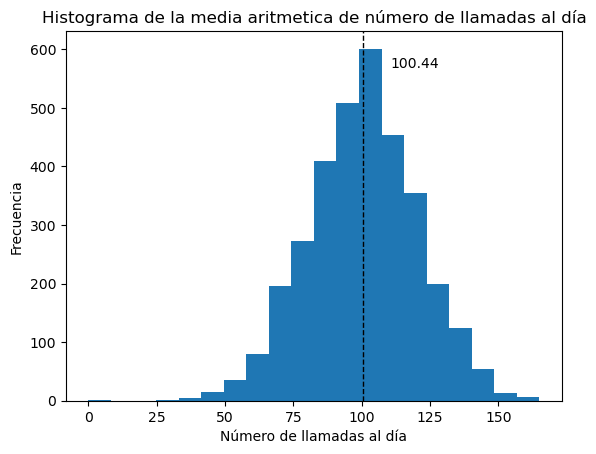

In [5]:
plt.hist(datos1,bins=20) # bins=10 default
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de la media aritmetica de número de llamadas al día")
plt.axvline(media_aritmetica, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(media_aritmetica*1.1, max_ylim*0.9,media_aritmetica)

### 1.1. Media truncada

 El cálculo de la media después de descartar las partes extremas de la distribución normalmente descartando una cantidad igual de ambos. 

\begin{align}
\bar{x}_T=\frac{\sum_{i=p+1}^{n-p}x_i}{n-2p}
\end{align}

con $p$ los valores extremos.

Para la mayoría de las aplicaciones estadísticas, se descartan del 5 al 25 por ciento de los extremo (cuartiles)

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/text.py:1242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text([110.52423423], 428.085, '[100.47657658]')

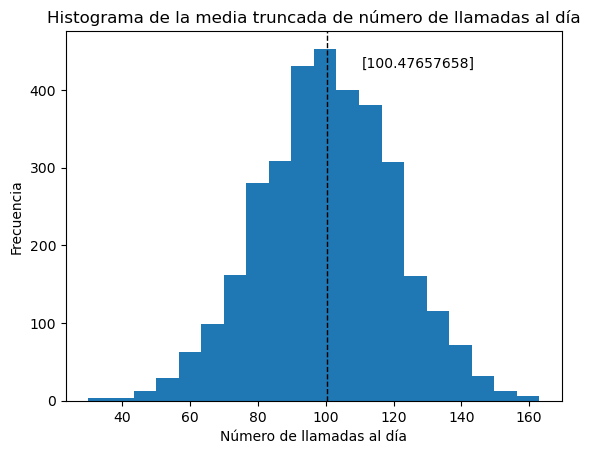

In [6]:


data2 = data[(data["Day Calls"]>data["Day Calls"].min()) & (data["Day Calls"]<data["Day Calls"].max())]
suma2 = data2["Day Calls"].sum()
elementos2 = data2["Day Calls"].shape
media2 = suma2 / elementos2

plt.hist(data2["Day Calls"],bins=20) # bins=10 default
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de la media truncada de número de llamadas al día")
plt.axvline(media2, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(media2*1.1, max_ylim*0.9,media2)

### 1.2 Media ponderada

Media que otorga diferentes pesos a los distintos valores sobre los que se calcula

\begin{align}
\bar{x}_w=\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}
\end{align}

In [7]:
pesos = data["CustServ Calls"]
def media_ponderada(datos, pesos):
  
    sum_numerador = sum([datos[i]*pesos[i] for i in range(len(datos))])
    sum_denominador = sum(pesos)
    
    return round(sum_numerador/sum_denominador,2)

media_aritmetica_ponderada= media_ponderada(datos1, pesos)
print(media_aritmetica_ponderada)

100.12


Text(110.13200000000002, 567.9449999999999, '100.12')

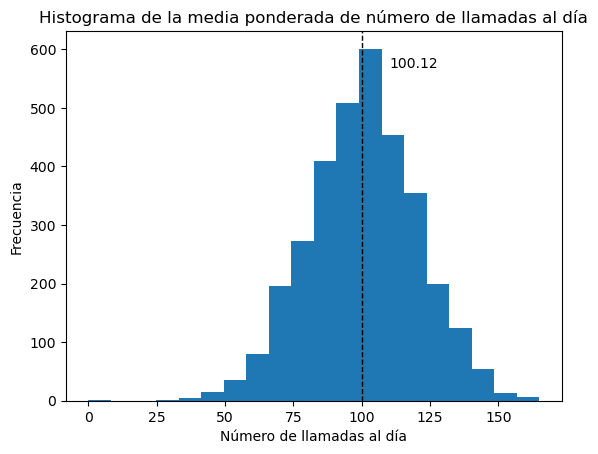

In [8]:
plt.hist(datos1,bins=20) # bins=10 default
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de la media ponderada de número de llamadas al día")
plt.axvline(media_aritmetica_ponderada, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(media_aritmetica_ponderada*1.1, max_ylim*0.9,media_aritmetica_ponderada)

# 2. Moda

Es el valor que aparece con mayor frecuencia en un conjunto de datos

# 3. Mediana

Es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se puede hallar solo para variables cuantitativas.

## 4. Desviación respecto a la media aritmética

Es la diferencia en valor absoluto entre cada valor de la variable estadística y la media aritmética.

\begin{align}
D_i = |x_i - \mu|
\end{align}

Text(0.5, 1.0, 'Histograma de la desviacion de la media de número de llamadas al día')

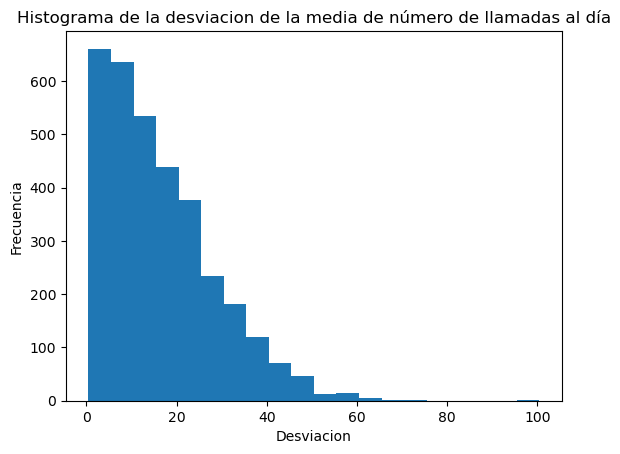

In [9]:

'''Desviacon de la media'''
desviacion = []
desviacion = [round(abs(data["Day Calls"] - media_aritmetica),2)]
plt.hist(desviacion,bins=20) # bins=10 default
plt.xlabel("Desviacion")
plt.ylabel("Frecuencia")
plt.title("Histograma de la desviacion de la media de número de llamadas al día")

## 5. Varianza

Es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. La varianza intenta describir la dispersión de los datos.

\begin{align}
\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}
\end{align}


In [10]:
'''Varianza'''
mu = media(datos1)
def varianza(datos):
    columns = len(datos)
    sumatory = sum((datos[i]-mu)*(datos[i]-mu) for i in range(columns))
    return round(sumatory/columns,2)

varianza(datos1)


402.65

# 6. Covarianza

La covarianza la varianza aplicado a una variable bidimensional. Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias.La covarianza indica el sentido de la correlación entre las variables:
1. cov > 0-> correlación es directa
2. cov = 0 -> no existe correlación
3. cov < 0 -> correlación es inversa. 

# 7. Desviación estandar

Es la raíz cuadrada de la varianza.

\begin{align}
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}}
\end{align}

In [11]:
'''Desviacion estandar'''
mu = media(datos1)
def standar_deviation(datos):
    columns = len(datos)
    sumatory = sum((datos[i]-mu)*(datos[i]-mu) for i in range(columns))
    return round(np.sqrt(sumatory/columns),2)

stand_dev = standar_deviation(datos1)


Text(70.335, 567.9449999999999, '$-\\sigma$')

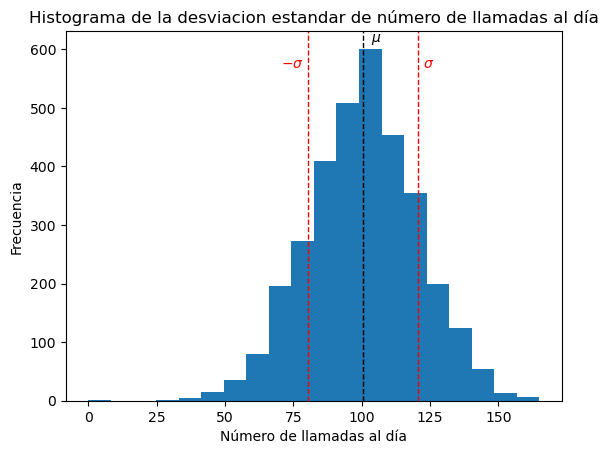

In [12]:
plt.hist(datos1,bins=20) # bins=10 default
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de la desviacion estandar de número de llamadas al día")
plt.axvline(media_aritmetica, color='k', linestyle='dashed', linewidth=1)
plt.axvline(media_aritmetica+stand_dev, color='r', linestyle='dashed', linewidth=1)
plt.axvline(media_aritmetica-stand_dev, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(media_aritmetica*1.03, max_ylim*0.97,"$\mu$")
plt.text(media_aritmetica+stand_dev*1.1, max_ylim*0.9,"$\sigma$",color='r')
plt.text(media_aritmetica-stand_dev*1.5, max_ylim*0.9,"$-\sigma$",color='r')


# 8. Cuartiles

Los **cuantiles** son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria.

Los **cuartiles** son cuantiles que se multiplican por un cuarto de un conjunto de datos, sinedo los tres puntos que dividen el conjunto de datos en cuatro grupos iguales, cada grupo comprende un cuarto de los datos.

**Q1**: es el número medio entre el número más pequeño y la mediana del conjunto de datos. 

**Q2**: es la mediana de los datos. 

**Q3**: es el valor medio entre la mediana y el valor más alto del conjunto de datos. 

# 9. Coeficiente de correlación 

Medida del grado de dependencia lineal entre dos variables, su valor se encuentra entre [-1,1] con: 
1. corr = 1 -> todos los puntos de datos se encuentran en  una línea recta de pendiente positiva
2. corr = 0 -> no existe una correlación lineal entre las variables
3. corr = -1 -> todos los puntos de datos se encuentran en una línea recta de pendiente negativa


In [21]:
""" 
Podemos utilizar pandas para obtener la información estadística de los datos.
"""
data.describe()


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000
